<h1 id="Analysis-of-Airline-On-Time-Performance-and-Flight-Delays"><span style="color: #ff0000;">Analysis of Airline On-Time Performance and Flight Delays</span></h1>

Many of us will already know this. July is known within the airline industry as the busiest travel month of the year. According to the Bureau of Travel Statistics, in 2014, 71.8 million people flew during July. That was 37 percent more passengers than got on a plane in February, 2014, the year’s slowest month. It is generally agreed that delay in the national air transportation system will become intolerable if aviation capacity is not increased.In this paper, we analyze all possible causes of delay that happens during Air Travel during July.  

<h2 style="color: #000000;">Data Collection</h2>
The data for analsys will be used from DATA.GOV - Department of Transportation.

The Bureau of Transportation Statistics (BTS) was established as a statistical agency in 1992. The Intermodal Surface Transportation Efficiency Act (ISTEA) of 1991 created BTS to administer data collection, analysis, and reporting and to ensure the most cost-effective use of transportation-monitoring resources. BTS brings a greater degree of coordination, comparability, and quality standards to transportation data, and facilitates in the closing of important data gaps.

http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236

Data downloaded for all available years from 1988 to 2016 (July Month only) 


<h2>Data Dictionary&nbsp;</h2>
<table style="height: 567px; border-color: blue;" width="587">
<tbody>
<tr>
<td style="width: 2px;">
<h4>Column Name</h4>
</td>
<td style="border-color: blue;">
<h4>Column Definition</h4>
</td>
</tr>
<tr>
<td style="width: 2px;">&nbsp;YEAR&nbsp;</td>
<td style="border-color: blue;">&nbsp;Year</td>
</tr>
<tr>
<td>&nbsp;QUARTER</td>
<td>Quarter (1-4)</td>
</tr>
<tr>
<td>&nbsp;MONTH&nbsp;</td>
<td>&nbsp;Month</td>
</tr>
<tr>
<td>&nbsp;DAY_OF_MONTH</td>
<td>&nbsp;Day of Month</td>
</tr>
<tr>
<td>&nbsp;DAY_OF_WEEK</td>
<td>&nbsp;Day of Week 1-Mon 2-Tue 3-Wed 4-Thu 5-Fri 6-Sat 7-Sun</td>
</tr>
<tr>
<td>&nbsp;FL_DATE</td>
<td>&nbsp;Flight Date (yyyymmdd)</td>
</tr>
<tr>
<td>&nbsp;CARRIER</td>
<td>&nbsp;Code assigned by IATA and commonly used to identify a carrier. As the same code may have&nbsp;been assigned to different carriers over time, the code is not always unique.&nbsp;</td>
</tr>
<tr>
<td>&nbsp;FL_NUM&nbsp;</td>
<td>&nbsp;Flight Number</td>
</tr>
<tr>
<td>&nbsp;ORIGIN</td>
<td>&nbsp;Origin Airport</td>
</tr>
<tr>
<td>&nbsp;ORIGIN_CITY_NAME</td>
<td>&nbsp;Origin Airport, City Name</td>
</tr>
<tr>
<td>&nbsp;ORIGIN_STATE_ABR</td>
<td>&nbsp;Origin Airport, State Code</td>
</tr>
<tr>
<td>&nbsp;DEST &nbsp;</td>
<td>&nbsp;Destination Airport</td>
</tr>
<tr>
<td>&nbsp;DEST_CITY_NAME&nbsp;</td>
<td>&nbsp;Destination Airport, City Name</td>
</tr>
<tr>
<td>&nbsp;DEST_STATE_ABR&nbsp;</td>
<td>&nbsp;Destination Airport, State Code</td>
</tr>
<tr>
<td>&nbsp;DEP_TIME</td>
<td>&nbsp;Actual Departure Time (local time: hhmm)</td>
</tr>
<tr>
<td>&nbsp;DEP_DELAY</td>
<td>&nbsp;Difference in minutes between scheduled and actual departure time. Early departures show&nbsp;negative numbers.</td>
</tr>
<tr>
<td>ARR_TIME</td>
<td>Actual Arrival Time (local time: hhmm)</td>
</tr>
<tr>
<td>ARR_DELAY</td>
<td>Difference in minutes between scheduled and actual arrival time.&nbsp;Early arrivals show negative numbers.</td>
</tr>
<tr>
<td>CARRIER_DELAY</td>
<td>Carrier Delay, in Minutes</td>
</tr>
<tr>
<td>WEATHER_DELAY</td>
<td>Weather Delay, in Minutes</td>
</tr>
<tr>
<td>NAS_DELAY</td>
<td>National Air System Delay, in Minutes</td>
</tr>
<tr>
<td>SECURITY_DELAY&nbsp;</td>
<td>Security Delay, in Minutes</td>
</tr>
<tr>
<td>LATE_AIRCRAFT_DELAY</td>
<td>Late Aircraft Delay, in Minutes</td>
</tr>
</tbody>
</table>

<h3 style="text-align: center;"><span style="color: #000000;">Computed Columns</span></h3>
<table style="height: 400px; border-color: blue;" width="587">
<tbody>
<tr>
<td style="width: 2px;">
<h4>Column Name</h4>
</td>
<td style="border-color: blue;">
<h4>Column Definition</h4>
</td>
</tr>
<tr style="height: 1px;">
<td style="width: 2px;">DEP_HOUR</td>
<td style="border-color: blue;">&nbsp;Departure Hour - derived from DEP_TIME</td>
</tr>
<tr>
<td>ARR_HOUR</td>
<td>Arrival Hour &nbsp; - derived from ARR_TIME</td>
</tr>
<tr>
<td>&nbsp;DEPR_ONTIME&nbsp;</td>
<td>&nbsp;On time Departure (0 - False 1 - True)</td>
</tr>
<tr>
<td>&nbsp;DEPR_EARLY</td>
<td>&nbsp;Early Departure (0 - False 1 - True)</td>
</tr>
<tr>
<td>&nbsp;DEPR_DELAY</td>
<td>&nbsp;Delayed Departure (0 - False 1 - True)</td>
</tr>
<tr>
<td>ARRL_ONTIME</td>
<td>&nbsp;On time Arrival &nbsp;(0 - False 1 - True)</td>
</tr>
<tr>
<td>&nbsp;ARRL_EARLY</td>
<td>&nbsp;Early Arrival (0 - False 1 - True)</td>
</tr>
<tr>
<td>&nbsp;ARRL_DELAY</td>
<td>&nbsp;Delayed Arrival (0 - False 1 - True)</td>
</tr>
<tr>
<td>LATE_AIRCRAFT_DELAY</td>
<td>Late Aircraft Delay, in Minutes</td>
</tr>
</tbody>
</table>


<h2 style="text-align: left;">Initialize Libraries</h2>

In [7]:
from pandas import Series, DataFrame
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pylab as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = 12, 9  # that's default image size for this interactive session

<h2 style="text-align: left;">Combine all downloaded CSV datafiles (July 1988 to July 2015)</h2>

In [18]:
airline_files = glob.glob("*.csv")
df_list = []
for filename in sorted(airline_files):
    df_list.append(pd.read_csv(filename))
full_df = pd.concat(df_list)

full_df.to_csv('AirlineJul89to15.csv')

### Read CSV File and inspect data

In [3]:
AirlineData = pd.read_csv("AirlineJul89to15.csv")
AirlineData.sample(n=5)

,Unnamed: 0,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,ORIGIN,...,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 23
6887671,14159,2003,3,7,28,1,2003-07-28,EV,4327,ATL,...,1600.0,50.0,1645.0,45.0,45.0,0.0,0.0,0.0,0.0,NaN
7095763,222251,2003,3,7,15,2,2003-07-15,AA,1494,DFW,...,2045.0,-2.0,2348.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
7266109,392597,2003,3,7,17,4,2003-07-17,TZ,618,OGG,...,1151.0,-9.0,1937.0,-8.0,NaN,NaN,NaN,NaN,NaN,NaN
11704933,552857,2010,3,7,29,4,2010-07-29,UA,187,SFO,...,1040.0,0.0,1210.0,-23.0,NaN,NaN,NaN,NaN,NaN,NaN
2428593,233920,1993,3,7,14,3,1993-07-14,NW,1067,MDW,...,1700.0,0.0,1823.0,-10.0,NaN,NaN,NaN,NaN,NaN,NaN


<h2 style="text-align: left;">Check the data to find the maximum and minimum values for Arrival and Departure Delays.</h2>

In [4]:
AirlineData.DEP_DELAY.min(), AirlineData.DEP_DELAY.max(), AirlineData.ARR_DELAY.min(),AirlineData.ARR_DELAY.max()

(-1200.0, 2445.0, -1035.0, 2449.0)

In [5]:
AirlineData.dtypes

Unnamed: 0               int64
YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                 object
CARRIER                 object
FL_NUM                   int64
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_STATE_ABR        object
DEST                    object
DEST_CITY_NAME          object
DEST_STATE_ABR          object
DEP_TIME               float64
DEP_DELAY              float64
ARR_TIME               float64
ARR_DELAY              float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 23            float64
dtype: object

In [6]:
AirlineData.shape

(14428435, 25)

<p style="text-align: left;">1. Departure and Arrival Delay data has extreme outliers in terms of minutes. Here it might be dificult to analyze based only on the Departure and Arrival Delay Minutes. <br />2. Data collected for analysis is available for 27 years and it would be also possible to analyze using the number of total flights for Departure Delay, Arrival Delay and Ontime.<br />3. Unwanted columns and data with NAN values will be dropped.<br />4. 6 additional columns will be added (DEPR_ONTIME, DEPR_EARLY, DEPR_DELAY, ARRL_ONTIME, ARRL_EARLY, ARRL_DELAY)<br />5. DEP_TIME will be used to derive DEP_HOUR. Similiarly ARR_TIME will be used to determine ARR_HOUR</p>
</blockquote>

<h2>Delete unwanted columns</h2>

In [7]:
AirlineData.drop(['Unnamed: 23','Unnamed: 0' ], axis=1, inplace=True)

Check and remove data with NULL or NAN values

In [8]:
AirlineData.isnull().sum()

YEAR                          0
QUARTER                       0
MONTH                         0
DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
FL_DATE                       0
CARRIER                       0
FL_NUM                        0
ORIGIN                        0
ORIGIN_CITY_NAME              0
ORIGIN_STATE_ABR           4694
DEST                          0
DEST_CITY_NAME                0
DEST_STATE_ABR             4623
DEP_TIME                 218167
DEP_DELAY                218167
ARR_TIME                 251215
ARR_DELAY                261774
CARRIER_DELAY          12706410
WEATHER_DELAY          12706410
NAS_DELAY              12706410
SECURITY_DELAY         12706410
LATE_AIRCRAFT_DELAY    12706410
dtype: int64

CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY and LATE_AIRCRAFT_DELAY has too many NULLs (12,706,410) and will be dropped in this analysis. 

In [9]:
AirlineData.drop(['FL_NUM', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_CITY_NAME'], axis=1, inplace=True)
AirlineData.drop(['DEST_STATE_ABR', 'CARRIER_DELAY'], axis=1, inplace=True)
AirlineData.drop(['WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1, inplace=True)
AirlineData.drop(['QUARTER', 'MONTH', 'FL_DATE'], axis=1, inplace=True)

In [10]:
NewAirlineData = AirlineData.dropna()
NewAirlineData.isnull().sum()

YEAR            0
DAY_OF_MONTH    0
DAY_OF_WEEK     0
CARRIER         0
ORIGIN          0
DEST            0
DEP_TIME        0
DEP_DELAY       0
ARR_TIME        0
ARR_DELAY       0
dtype: int64

In [11]:
NewAirlineData.shape

(14166661, 10)

In [12]:
NewAirlineData.describe()

,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY
count,1.416666e+07,1.416666e+07,1.416666e+07,1.416666e+07,1.416666e+07,1.416666e+07,1.416666e+07
mean,2.002306e+03,1.611186e+01,3.949736e+00,1.345432e+03,1.021295e+01,1.480091e+03,8.694099e+00
std,7.913722e+00,8.908127e+00,1.992211e+00,4.858655e+02,3.322419e+01,5.135577e+02,3.572979e+01
min,1.988000e+03,1.000000e+00,1.000000e+00,1.000000e+00,-1.200000e+03,1.000000e+00,-1.035000e+03
25%,1.996000e+03,8.000000e+00,2.000000e+00,9.300000e+02,-2.000000e+00,1.104000e+03,-8.000000e+00
50%,2.003000e+03,1.600000e+01,4.000000e+00,1.330000e+03,0.000000e+00,1.513000e+03,0.000000e+00
75%,2.009000e+03,2.400000e+01,6.000000e+00,1.740000e+03,8.000000e+00,1.915000e+03,1.200000e+01
max,2.015000e+03,3.100000e+01,7.000000e+00,2.400000e+03,2.445000e+03,2.400000e+03,2.449000e+03


In [13]:
NewAirlineData.to_csv('Airline.csv')

In [14]:
AirlineData = pd.read_csv("Airline.csv")

In [15]:
AirlineData.shape

(14166661, 11)

In [16]:
AirlineData['DEPR_ONTIME'] = np.where(AirlineData.DEP_DELAY == 0, 1 , 0)
AirlineData['DEPR_EARLY'] = np.where(AirlineData.DEP_DELAY < 0, 1 , 0)
AirlineData['DEPR_DELAY'] = np.where(AirlineData.DEP_DELAY > 0, 1 , 0)
AirlineData['ARRL_ONTIME'] = np.where (AirlineData.ARR_DELAY == 0, 1 , 0)
AirlineData['ARRL_EARLY'] = np.where(AirlineData.ARR_DELAY < 0, 1 , 0)
AirlineData['ARRL_DELAY'] = np.where(AirlineData.ARR_DELAY > 0, 1 , 0)

In [17]:
AirlineData['DEP_HOUR'] = AirlineData['DEP_TIME']//100
AirlineData['ARR_HOUR'] = AirlineData['ARR_TIME']//100

In [18]:
AirlineData.head()

,Unnamed: 0,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DEPR_ONTIME,DEPR_EARLY,DEPR_DELAY,ARRL_ONTIME,ARRL_EARLY,ARRL_DELAY,DEP_HOUR,ARR_HOUR
0,0,1988,1,5,AA,JFK,LAX,901.0,1.0,1120.0,-18.0,0,0,1,0,1,0,9.0,11.0
1,1,1988,3,7,AA,JFK,LAX,900.0,0.0,1113.0,-25.0,1,0,0,0,1,0,9.0,11.0
2,2,1988,4,1,AA,JFK,LAX,901.0,1.0,1111.0,-27.0,0,0,1,0,1,0,9.0,11.0
3,3,1988,5,2,AA,JFK,LAX,902.0,2.0,1109.0,-29.0,0,0,1,0,1,0,9.0,11.0
4,4,1988,6,3,AA,JFK,LAX,903.0,3.0,1108.0,-30.0,0,0,1,0,1,0,9.0,11.0


In [19]:
AirlineData.dtypes

Unnamed: 0        int64
YEAR              int64
DAY_OF_MONTH      int64
DAY_OF_WEEK       int64
CARRIER          object
ORIGIN           object
DEST             object
DEP_TIME        float64
DEP_DELAY       float64
ARR_TIME        float64
ARR_DELAY       float64
DEPR_ONTIME       int32
DEPR_EARLY        int32
DEPR_DELAY        int32
ARRL_ONTIME       int32
ARRL_EARLY        int32
ARRL_DELAY        int32
DEP_HOUR        float64
ARR_HOUR        float64
dtype: object

In [20]:
AirlineData.to_csv('AirlineAnalysis.csv')

<h2>Data Exploration</h2>

In [8]:
AirlineData = pd.read_csv("AirlineAnalysis.csv")

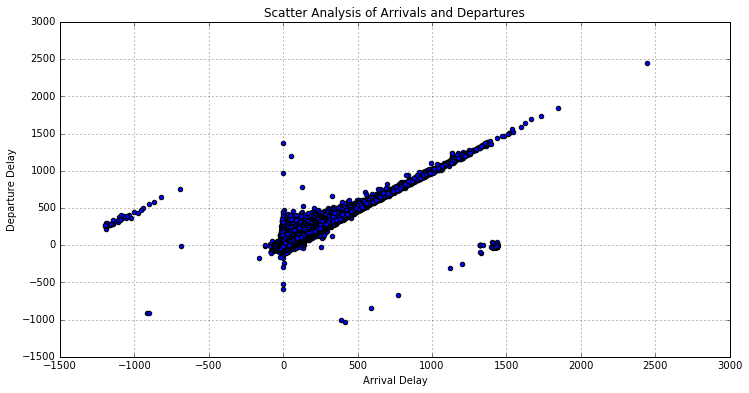

In [17]:
plt.scatter(AirlineData.DEP_DELAY,AirlineData.ARR_DELAY)
plt.xlabel('Arrival Delay')
plt.ylabel('Departure Delay')
plt.title('Scatter Analysis of Arrivals and Departures')
plt.grid(True)

<p>Scatter analysis show a correlation between Departure and Arrival. Late departures mostly result in late arrival.</p>

<h3>Yearly Analysis - Departure/Arrival from 1988 to 2015</h3>

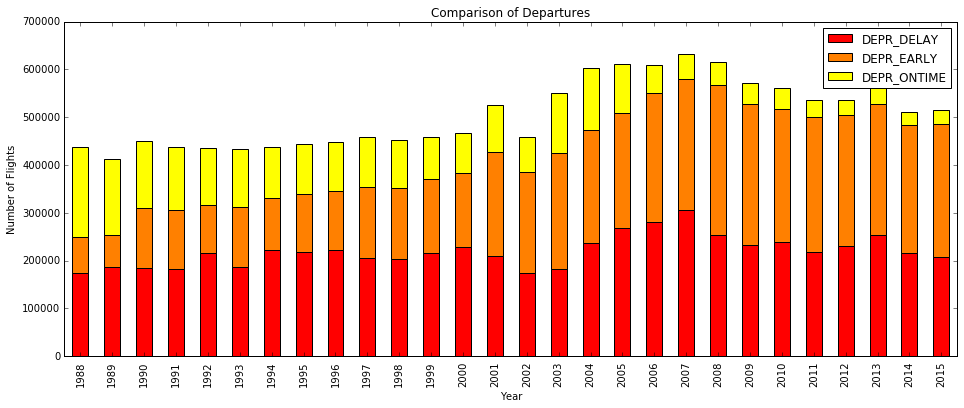

In [10]:
AirlineData.pivot_table(columns='YEAR')
delays_list = ['DEPR_DELAY','DEPR_EARLY','DEPR_ONTIME']
flight_delays_by_day = AirlineData.pivot_table(index='YEAR', values=delays_list, aggfunc='sum')
flight_delays_by_day.plot(kind='bar', figsize=[16,6], stacked=True, colormap='autumn') # area plot
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Comparison of Departures')

<p>On time Departure has been seen slowly declining at the end. Also suprisingly early departure has also been steadily increasing. Delayed departure is almost proportional with the total number of flights.</p>

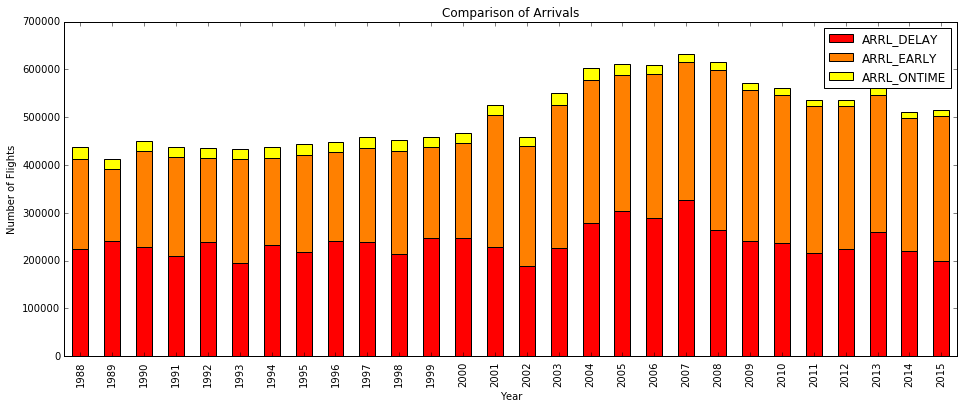

In [11]:
AirlineData.pivot_table(columns='YEAR')
delays_list = ['ARRL_ONTIME','ARRL_EARLY','ARRL_DELAY']
flight_delays_by_day = AirlineData.pivot_table(index='YEAR', values=delays_list, aggfunc='sum')
flight_delays_by_day.plot(kind='bar', figsize=[16,6], stacked=True, colormap='autumn') # area plot
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Comparison of Arrivals')

<p>While On time Arrival seems to be consistent, early arrival has also been steadily increasing. Delayed arrival is is almost proportional with the total number of flights.</p>

<h3>Day of the Month Analysis - Departures/Arrivals from 1988 to 2015</h3>

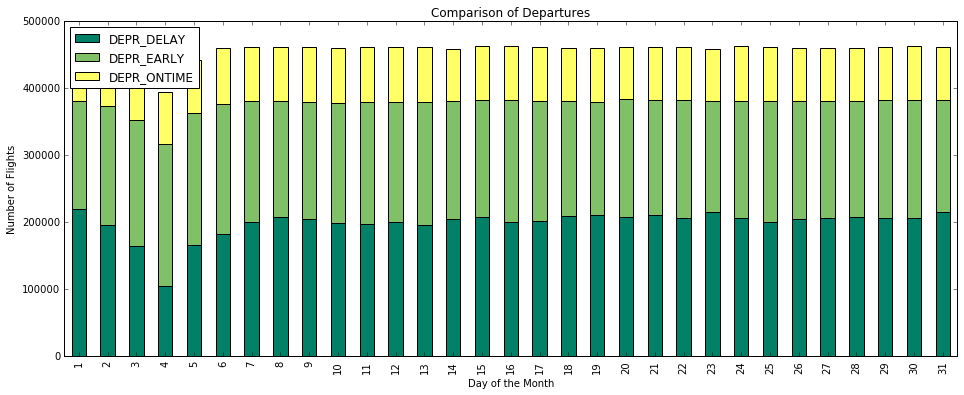

In [22]:
AirlineData.pivot_table(columns='DAY_OF_MONTH')
delays_list = ['DEPR_DELAY','DEPR_EARLY','DEPR_ONTIME']
flight_delays_by_day = AirlineData.pivot_table(index='DAY_OF_MONTH', values=delays_list, aggfunc='sum')
flight_delays_by_day.plot(kind='bar', figsize=[16,6], stacked=True, colormap='summer') # area plot
plt.xlabel('Day of the Month')
plt.ylabel('Number of Flights')
plt.title('Comparison of Departures')

<p>There seems to be some consistency on the departures through all days of the month, except on July 4, the air traffice seems to be less.</p>

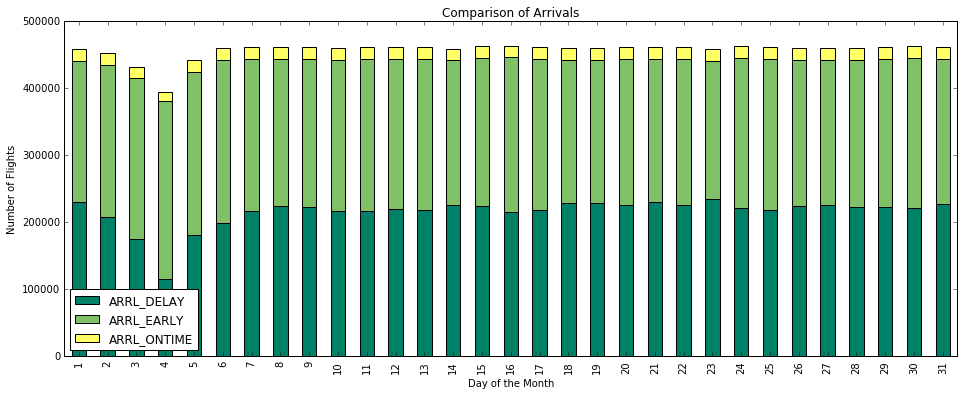

In [25]:
AirlineData.pivot_table(columns='DAY_OF_MONTH')
delays_list = ['ARRL_ONTIME','ARRL_EARLY','ARRL_DELAY']
flight_delays_by_day = AirlineData.pivot_table(index='DAY_OF_MONTH', values=delays_list, aggfunc='sum')
flight_delays_by_day.plot(kind='bar', figsize=[16,6], stacked=True, colormap='summer') # area plot
plt.xlabel('Day of the Month')
plt.ylabel('Number of Flights')
plt.title('Comparison of Arrivals')

<p>There seems to be some consistency on the Arrivals&nbsp;through all days of the month, except on July 4, the air traffice seems to be less.</p>

<h3>Day of the Week Analysis - Departures/Arrivals from 1988 to 2015</h3>

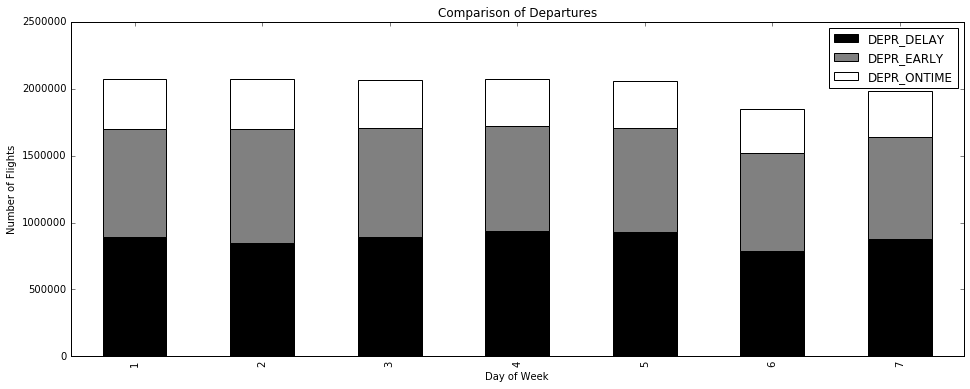

In [29]:
AirlineData.pivot_table(columns='DAY_OF_WEEK')
delays_list = ['DEPR_DELAY','DEPR_EARLY','DEPR_ONTIME']
flight_delays_by_day = AirlineData.pivot_table(index='DAY_OF_WEEK', values=delays_list, aggfunc='sum')
flight_delays_by_day.plot(kind='bar', figsize=[16,6], stacked=True, colormap='gray') # area plot
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.title('Comparison of Departures')

<p>There seems to be some consistency on the Departures&nbsp;through all days of the week, while air traffic on Saturday is less.</p>

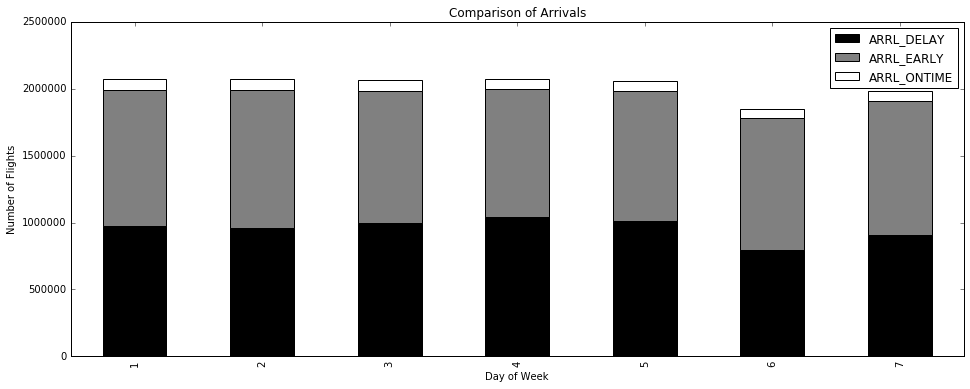

In [30]:
AirlineData.pivot_table(columns='DAY_OF_WEEK')
delays_list = ['ARRL_ONTIME','ARRL_EARLY','ARRL_DELAY']
flight_delays_by_day = AirlineData.pivot_table(index='DAY_OF_WEEK', values=delays_list, aggfunc='sum')
flight_delays_by_day.plot(kind='bar', figsize=[16,6], stacked=True, colormap='gray') # area plot
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.title('Comparison of Arrivals')

<p>There seems to be some consistency on the Arrivals&nbsp;through all days of the week, while air traffic on Saturday is less. Arrival delays on &nbsp;Wednesdays, Thursdays and Fridays seem to be a bit more than other days.&nbsp;</p>

<h3>Hour of the Day Analysis - Departures/Arrivals from 1988 to 2015</h3>

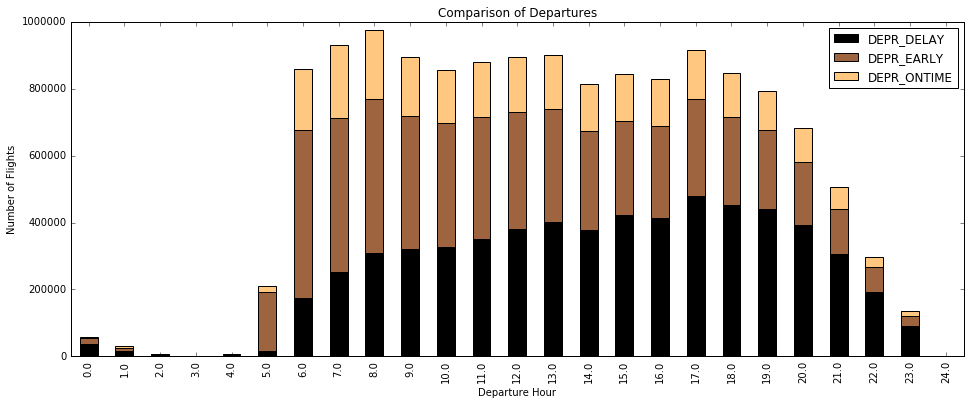

In [33]:
AirlineData.pivot_table(columns='DEP_HOUR')
delays_list = ['DEPR_DELAY','DEPR_EARLY','DEPR_ONTIME']
flight_delays_by_day = AirlineData.pivot_table(index='DEP_HOUR', values=delays_list, aggfunc='sum')
flight_delays_by_day.plot(kind='bar', figsize=[16,6], stacked=True, colormap='copper') # area plot
plt.xlabel('Departure Hour')
plt.ylabel('Number of Flights')
plt.title('Comparison of Departures')

<p>Departure delays are more in the evenings.&nbsp;</p>

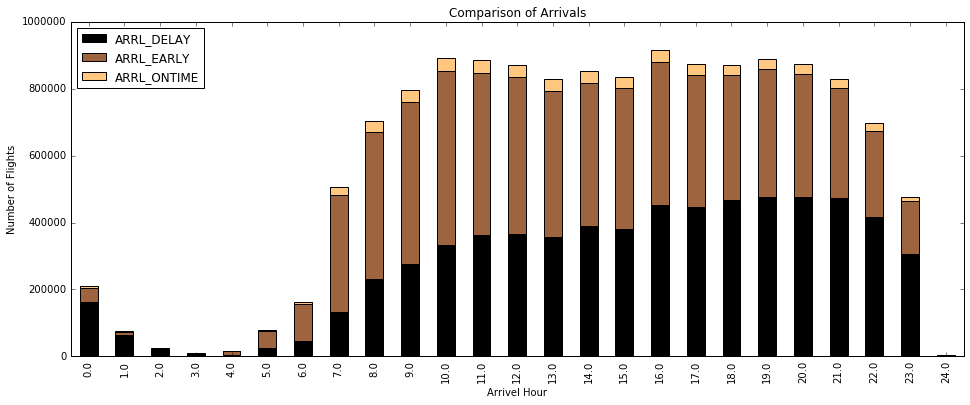

In [34]:
AirlineData.pivot_table(columns='ARR_HOUR')
delays_list = ['ARRL_ONTIME','ARRL_EARLY','ARRL_DELAY']
flight_delays_by_day = AirlineData.pivot_table(index='ARR_HOUR', values=delays_list, aggfunc='sum')
flight_delays_by_day.plot(kind='bar', figsize=[16,6], stacked=True, colormap='copper') # area plot
plt.xlabel('Arrivel Hour')
plt.ylabel('Number of Flights')
plt.title('Comparison of Arrivals')

<p>Arrival delays are more in the evenings and night till 9pm.&nbsp;</p>